<a href="https://colab.research.google.com/github/AjeetChaudhary/Web/blob/master/Flipkart_web_scraping_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
library(rvest)
library(tidyverse)
library(tm)
library(wordcloud2)


In [0]:
install.packages("tm")

In [0]:
install.packages("wordcloud2")

In [0]:

##Extracting data from Flipkart



comments=lapply(paste0('https://www.flipkart.com/apple-iphone-xs-gold-64-gb/product-reviews/itmf944emgqmhujk?pid=MOBF944EAPESBRZM&lid=LSTMOBF944EAPESBRZMGLSVMN&marketplace=FLIPKART&page=', 1:63),
                function(url){
                  url %>% read_html() %>% 
                    html_nodes("div.qwjRop") %>% 
                    html_text()
                })


In [9]:
comments[1:3]

[[1]]
 [1] "Genuine Apple product!  Loved it. And Delivery was also fast. Best phone from flipkart!READ MORE"                                                                                                                                                                                                                                                                                                                                                                                                                       
 [2] "ExcellentREAD MORE"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
 [3] "On wifi net 2 days backup nice phoneREAD MORE"                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [4] "A awesome phone in this butget . camera is awesome . it is a beastREAD MORE"                                                                                                                                                                                                                                                                                                                                                                                                                                            
 [5] "The flagship model by Apple definitely does justice to it's name. Superb camera and performance. Battery drains a bit though after regular usage but the A12 bionic professor makes life betterREAD MORE"                                                                                                                                                                                                                                                                                                               
 [6] "Camera quality A1, Smoothly working like Makkhan. Video Quality is supper both Day & nightREAD MORE"                                                                                                                                                                                                                                                                                                                                                                                                                    
 [7] "I ordered this phone during flipkart sale and this phone is absolutely amazing now people ask why should we buy iPhone xs when iPhone 11 is available in similar price, following is the reason ,iPhone xs has OLED display which makes huge difference in images! (Iphone 11 has LCD display which is not good at all)Image resolution is better in iPhone XS!The most important thing is the premium feel that we get in iPhone XS due to its stainless steel body and not like aluminium used in iPhone 11!READ MORE"
 [8] "Nice one \U0001f973🧡READ MORE"                                                                                                                                                                                                                                                                                                                                                                                             

In [0]:
comment_fl=tolower(comments)%>%removePunctuation()%>%removeNumbers()%>%stripWhitespace()
comment_fl=removeWords(comment_fl,stopwords("en"))
comment_fl=removePunctuation(comment_fl)
rm_comment=c("phone","iphone","flipkart","product","apple","got","one","flipkartread","goodread","better","day","thank","just","productread","really","can","also","read","good","last","will","date","never")
comment_fl=removeWords(comment_fl,rm_comment)
comment_fl=gsub("read"," ",comment_fl)
comment_fl=gsub("^c"," ",comment_fl)
comment_corpus=Corpus(VectorSource(comment_fl))
comment_dtm=DocumentTermMatrix(comment_corpus)
comment_matrix=as.matrix(comment_dtm)
comment_freq=colSums(comment_matrix)
comment_df=data.frame(name=names(comment_freq),occur=comment_freq)
comment_df=comment_df%>%arrange(desc(occur))





In [11]:
head(comment_df)

,name,occur
,<fct>,<dbl>
1,best,95
2,awesome,76
3,camera,70
4,nice,66
5,price,62
6,amazing,55


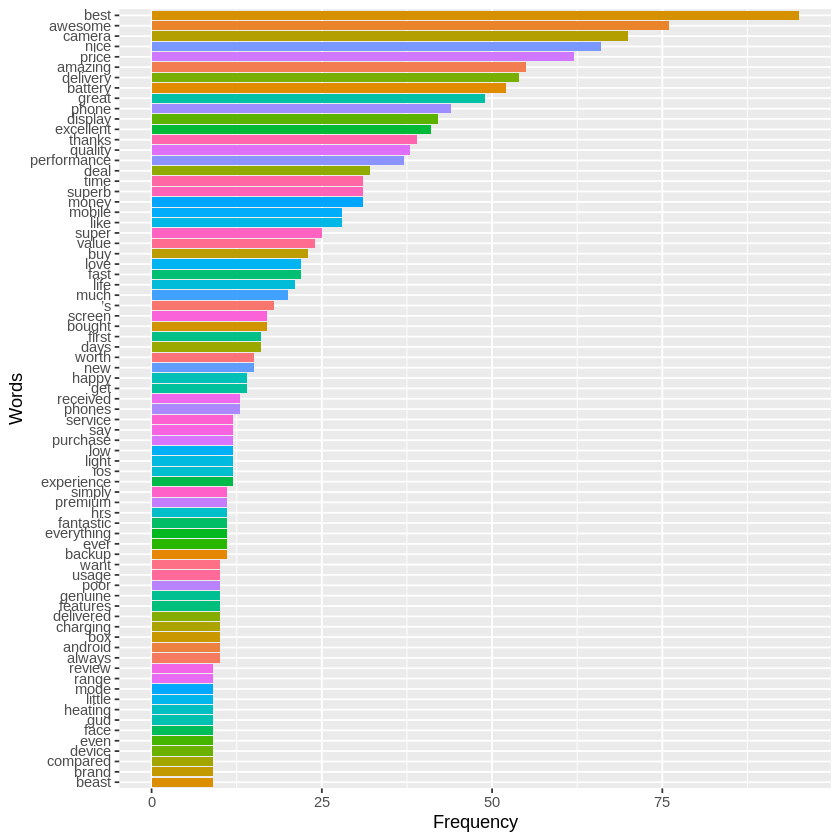

In [0]:

comment_df%>%filter(occur>8)%>%ggplot(aes(reorder(name,occur),occur,fill=name))+geom_bar(stat="identity")+coord_flip()+ylab("Frequency")+xlab("Words")+theme(legend.position = "none")

In [0]:
wordcloud2(comment_df)

In [0]:


reviews <- lapply(paste0('https://www.flipkart.com/apple-iphone-xs-gold-64-gb/product-reviews/itmf944emgqmhujk?pid=MOBF944EAPESBRZM&lid=LSTMOBF944EAPESBRZMGLSVMN&marketplace=FLIPKART&page=', 1:39),
                function(url){
                  url %>% read_html() %>% 
                    html_nodes("._2xg6Ul") %>% 
                    html_text()
                })







In [14]:
head(reviews)

[[1]]
 [1] "Simply awesome" "Terrific"       "Excellent"      "Great product" 
 [5] "Awesome"        "Simply awesome" "Great product"  "Excellent"     
 [9] "Brilliant"      "Brilliant"     

[[2]]
 [1] "Brilliant"             "Great product"         "Great product"        
 [4] "Perfect product!"      "Super!"                "Terrific"             
 [7] "Mind-blowing purchase" "Classy product"        "Terrific purchase"    
[10] "Terrific purchase"    

[[3]]
 [1] "Just wow!"           "Pretty good"         "Best in the market!"
 [4] "Classy product"      "Highly recommended"  "Just okay"          
 [7] "Terrific purchase"   "Terrific"            "Perfect product!"   
[10] "Brilliant"          

[[4]]
 [1] "Fabulous!"              "Just wow!"              "Just wow!"             
 [4] "Useless product"        "Perfect product!"       "Utterly Disappointed"  
 [7] "Simply awesome"         "Terrific purchase"      "Great product"         
[10] "Not recommended at all"

[[5]]
 [1] "Simply awesome"      "Awesome"             "Best in the market!"
 [4] "Awesome"             "MAITRA "             "Delivery"           
 [7] "Must buy!"           "Pretty good"         "Decent product"     
[10] "Worth the money"    

[[6]]
 [1] "Terrific"                    "Smart and classic product ."
 [3] "Just wow!"                   "Best in the market!"        
 [5] "Wonderful"                   "Really Nice"                
 [7] "Wonderful"                   "Perfect product!"           
 [9] "Perfect product!"            "Perfect product!"

In [0]:
review_clean=removePunctuation(as.character(reviews))
review_clean=removeWords(review_clean,stopwords("en"))
review_clean=gsub("^c"," ",review_clean)
reviews_corpus=Corpus(VectorSource(review_clean))
reviews_tdf=TermDocumentMatrix(reviews_corpus)
reviews_matrix=as.matrix(reviews_tdf)
freqr_reviews=rowSums(reviews_matrix)
reviews_dff=data.frame(name=names(freqr_reviews),occur=freqr_reviews)%>%arrange(desc(occur))
reviews_dff1=reviews_dff[-c(1,8,10,24,31,29,33,34,36,37,44,48,46,52,59),]

In [16]:
head(reviews_dff1)

,name,occur
,<fct>,<dbl>
2,awesome,43
3,purchase,36
4,terrific,33
5,perfect,27
6,simply,22
7,just,22


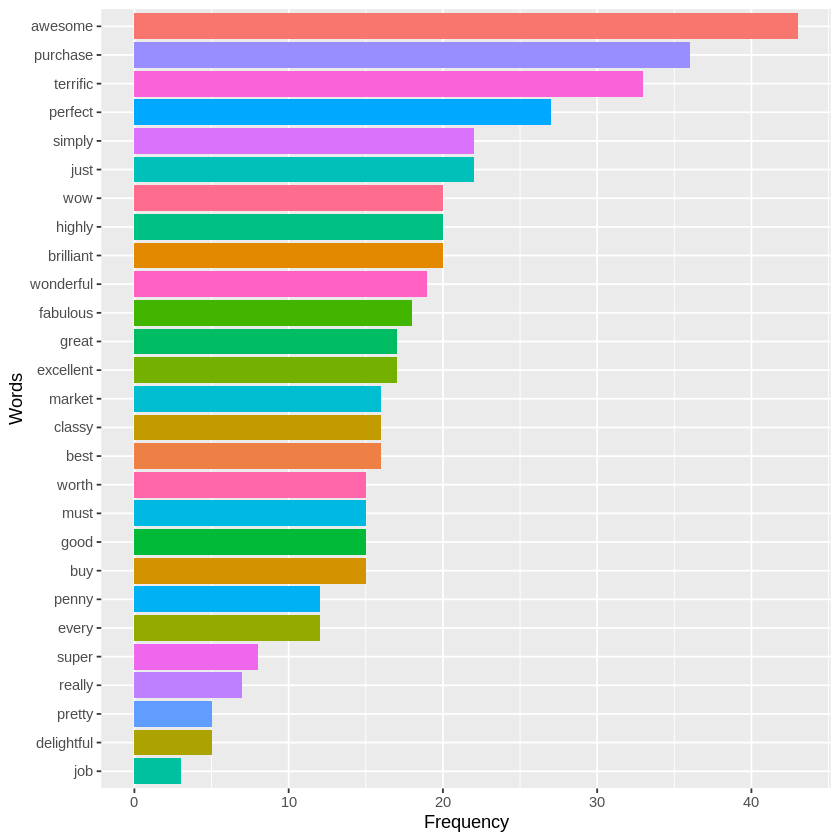

In [0]:

reviews_dff1%>%filter(occur>2)%>%ggplot(aes(reorder(name,occur),occur,fill=name))+geom_bar(stat="identity")+coord_flip()+ylab("Frequency")+xlab("Words")+theme(legend.position = "none")


In [0]:
reviews_dff1%>%filter(occur>2)%>%wordcloud2()

In [21]:
##We are going to find correlation between important words
findAssocs(comment_dtm,"battery",0.7)
findAssocs(comment_dtm,"screen",0.5)
findAssocs(comment_dtm,"android",0.5)
findAssocs(comment_dtm,"poor",0.52)
findAssocs(comment_dtm,"heating",0.52)

$battery
            allgreat               become            bloatware 
                0.85                 0.85                 0.85 
              colors          complaining displayoledexcellent 
                0.85                 0.85                 0.85 
               drain           equivalent               fastly 
                0.85                 0.85                 0.85 
        lowotherwise              offerto      performancegood 
                0.85                 0.85                 0.85 
              punchy   qualitycompactonly         satisfactory 
                0.85                 0.85                 0.85 
                 sec              shifted                  sum 
                0.85                 0.85                 0.85 
                upto                   😍❤️               backup 
                0.85                 0.85                 0.82 
                dark               unlock                  day 
                0.77                 0.73                 0.71

$screen
        team disappointed      without      scratch         fans         past 
        0.68         0.55         0.55         0.55         0.55         0.55 
     picture         wont        along        color      selling       simply 
        0.55         0.55         0.55         0.55         0.55         0.52 
       since     possible      iphones      display 
        0.52         0.52         0.51         0.50

$android
                   maybe                     even              unavailable 
                    0.71                     0.60                     0.55 
                    cons                    apart                      end 
                    0.55                     0.55                     0.55 
                     sim                   update                      bit 
                    0.55                     0.55                     0.54 
                     ios                      ago                    beats 
                    0.54                     0.53                     0.53 
            biasedbefore                  clarity                    clear 
                    0.53                     0.53                     0.53 
                deciding                discounts                  disturb 
                    0.53                     0.53                     0.53 
                  driver                   earned excellentawesometerrific 
                    0.53                     0.53                     0.53 
                  excess                     eyes                      gen 
                    0.53                     0.53                     0.53 
                    give                     hard                    hates 
                    0.53                     0.53                     0.53 
                    hope                 imagined                    loves 
                    0.53                     0.53                     0.53 
            outstandingk            priceportrait                  savings 
                    0.53                     0.53                     0.53 
                    sold                  someday                  someone 
                    0.53                     0.53                     0.53 
                  waited                     wala                   wasn’t 
                    0.53                     0.53                     0.53 
                   ahead              androidwant                  arrived 
                    0.53                     0.53                     0.53 
                  batter                 callsand                committed 
                    0.53                     0.53                     0.53 
             decisionits                    early             expectations 
                    0.53                     0.53                     0.53 
               extremely                fulfilled                  haven’t 
                    0.53                     0.53                     0.53 
                  highly              information                  iphonei 
                    0.53                     0.53                     0.53 
                 journey              launchedand                    major 
                    0.53                     0.53                     0.53 
                   miles                   nicely                  ownjust 
                    0.53                     0.53                     0.53 
                    real              recommended                      sad 
                    0.53                     0.53                     0.53 
                 secured                   selfie                    smart 
                    0.53                     0.53                     0.53 
                   swift                  updates                   little 
                    0.53                     0.53                     0.51

$poor
             image           accepted             beauty            clearly 
              0.60               0.58               0.58               0.58 
            corona           coverage              delhi        displaygood 
              0.58               0.58               0.58               0.58 
displayperformance          elephanti           everyone         everywhere 
              0.58               0.58               0.58               0.58 
            frands              fraud         generation            gorilla 
              0.58               0.58               0.58               0.58 
            happen              hated             indoor            issuesi 
              0.58               0.58               0.58               0.58 
           justify               kept            kidneys               mate 
              0.58               0.58               0.58               0.58 
             metro            network        networkwifi             owners 
              0.58               0.58               0.58               0.58 
             pixel  pixelloudspeakers     pixelportraits           required 
              0.58               0.58               0.58               0.58 
           screens             surely            swiping              users 
              0.58               0.58               0.58               0.58

$heating
           packed             steal             maybe            mostly 
             0.78              0.78              0.61              0.57 
      improvement       accessories    backuppowerful           believe 
             0.57              0.55              0.55              0.55 
benchmarkhardware             cable              case           checked 
             0.55              0.55              0.55              0.55 
        concerned      conditionbut              cost             cover 
             0.55              0.55              0.55              0.55 
         designed             found           happens        imagespoor 
             0.55              0.55              0.55              0.55 
              ist              item              jan’          lighting 
             0.55              0.55              0.55              0.55 
      lookingmass              mass          mobileno    mobileoriginal 
             0.55              0.55              0.55              0.55 
  performancei’ll          pictures               pre    qualitycompact 
             0.55              0.55              0.55              0.55 
      qualitylook      questionable        relatively           stocked 
             0.55              0.55              0.55              0.55 
             thus          timegood      usageawesome               ❤️❤️❤️ 
             0.55              0.55              0.55              0.55 
            ahead       androidwant           arrived            batter 
             0.55              0.55              0.55              0.55 
         callsand         committed       decisionits             early 
             0.55              0.55              0.55              0.55 
     expectations         extremely         fulfilled           haven’t 
             0.55              0.55              0.55              0.55 
           highly       information           iphonei           journey 
             0.55              0.55              0.55              0.55 
      launchedand             major             miles            nicely 
             0.55              0.55              0.55              0.55 
          ownjust              real       recommended               sad 
             0.55              0.55              0.55              0.55 
          secured            selfie             smart             swift 
             0.55              0.55              0.55              0.55 
          updates 
             0.55

In [0]:
install.packages("igraph")

In [0]:
library(igraph)

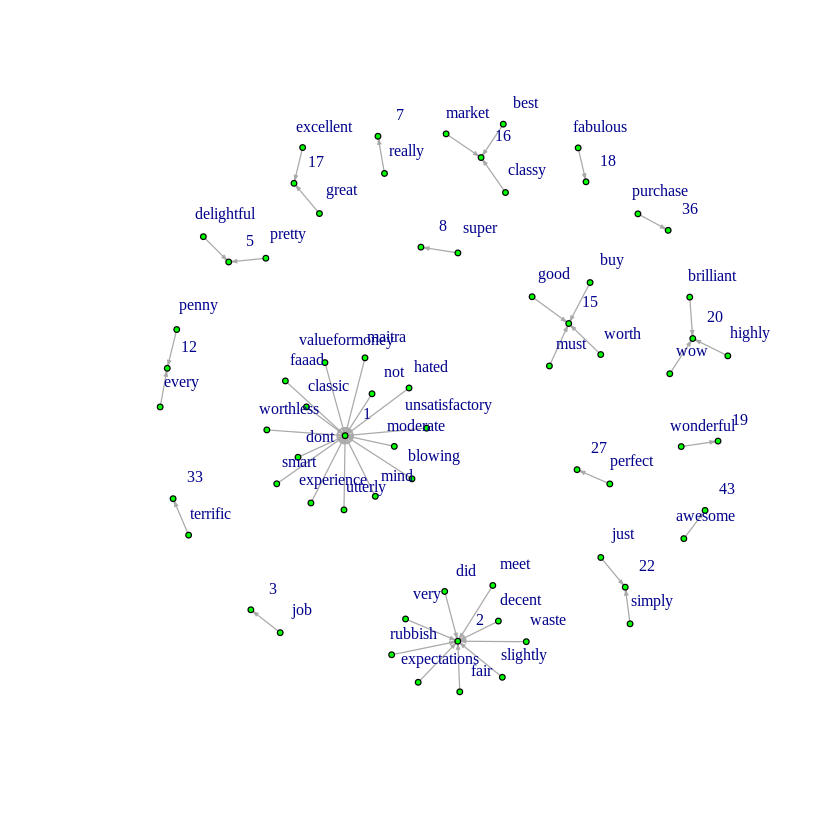

In [24]:
net=graph.data.frame(reviews_dff1)
V(net)$label=V(net)$name
V(net)$degree=degree(net)


set.seed(222)
plot(net,vertex.color="green",vertex.size=2,vertex.label.dist=1.5,edge.arrow.size=0.2,vertex.label.cex=0.8,layout=layout.fruchterman.reingold)